<a href="https://colab.research.google.com/github/Veewy/AML/blob/main/AML_1)_EDA%2CData_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌹 **Anti Money Laundering**  🌹    

# 1) Aim of Study

To evaluate if recurrent neural network (RNN)-style machine learning models, e.g., LSTM are suitable for detecting suspicious financial transactions within the synthetic data, given a significant portion of the fraudulent transactions can be represented as time-series events. This leads to the following main research question (RQ) and 3 sub RQs:

-   *“How effective are LSTM models in detecting money laundering activities within synthetic transaction datasets?”*
---
- RQ 1: Which features are relevant and predictive to the detection of money laundering activities using LSTM models?
---
- RQ 2: How does the performance of LSTM models in detecting AML compare to other machine learning techniques that have been used as benchmarks in previous studies?
---
- RQ 3: What are the challenges and limitations of the LSTM models and how can these be addressed?
---

The findings from this study will be valuable to researchers, AML professionals, financial institutions, and regulatory bodies. By providing insights into the performance of LSTM models in detecting suspicious transactions, the results can help improve fraud detection systems.

# 2) Data Import & Initail Exploration  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# import dataset SAML_D
from google.colab import drive
drive.mount('/content/drive')
df_AML = pd.read_csv('/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Dataset/SAML-D.csv', sep = ',')

# for easily handling, convert column names to lowercase
df_AML.columns = df_AML.columns.str.lower()
df_AML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [ ]:
df_AML.head(50)

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
5,10:35:21,2022-10-07,8974559268,3143547511,5130.99,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
6,10:35:23,2022-10-07,980191499,8577635959,12176.52,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
7,10:35:23,2022-10-07,8057793308,9350896213,56.90,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
8,10:35:26,2022-10-07,6116657264,656192169,4738.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
9,10:35:29,2022-10-07,7421451752,2755709071,5883.87,Indian rupee,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out


Features of dataset :

- Time and Date: Essential for tracking transaction chronology.

- Sender and Receiver Account Details: Helps uncover behavioural patterns and complex banking connections.

- Amount: Indicates transaction values to identify suspicious activities.

- Payment Type: Includes various methods like credit card, debit card, cash, ACH transfers, cross-border, and cheque.

- Sender and Receiver Bank Location: Pinpoints high-risk regions including Mexico, Turkey, Morocco, and the UAE.

- Payment and Receiver Currency: Align with location features, adding complexity when mismatched.

- 'Is Suspicious' Feature: Binary indicator differentiating normal from suspicious transactions.

- Type: Classifies typologies, offering deeper insights.

https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml/data

### Prelim. check dataset

In [ ]:
df_AML.info()

# NOTE: ❌ incorrect datatype - for time & date (to be revised)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   time                    object 
 1   date                    object 
 2   sender_account          int64  
 3   receiver_account        int64  
 4   amount                  float64
 5   payment_currency        object 
 6   received_currency       object 
 7   sender_bank_location    object 
 8   receiver_bank_location  object 
 9   payment_type            object 
 10  is_laundering           int64  
 11  laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [ ]:
df_AML.columns

Index(['time', 'date', 'sender_account', 'receiver_account', 'amount',
       'payment_currency', 'received_currency', 'sender_bank_location',
       'receiver_bank_location', 'payment_type', 'is_laundering',
       'laundering_type'],
      dtype='object')

In [ ]:
df_AML[['is_laundering']].value_counts()

,count
is_laundering,
0,9494979
1,9873


In [ ]:
df_AML.describe()

,sender_account,receiver_account,amount,is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [ ]:
df_AML[['sender_account']].value_counts().sort_values(ascending=True)

,count
sender_account,
5005103823,1
571912447,1
572071979,1
572362592,1
572372566,1
...,...
2357599526,749
3831533348,749
5579295130,751


In [ ]:
df_AML[['receiver_account']].value_counts().sort_values(ascending=True)

,count
receiver_account,
9018,1
1064142337,1
4721261368,1
1064093322,1
1064036833,1
...,...
4808614002,737
5579295130,739
5460360634,740


In [ ]:
df_AML[['amount']].value_counts().sort_values(ascending=True)

,count
amount,
12618498.40,1
38309.52,1
44258.11,1
38307.33,1
44261.32,1
...,...
112.76,45
121.53,45
72.39,46


In [ ]:
df_AML[['payment_currency']].value_counts().sort_values(ascending=True)

,count
payment_currency,
Indian rupee,24657
Albanian lek,24778
Mexican Peso,24852
Moroccan dirham,25395
Yen,25562
US dollar,26061
Naira,27143
Pakistani rupee,27196
Dirham,27263


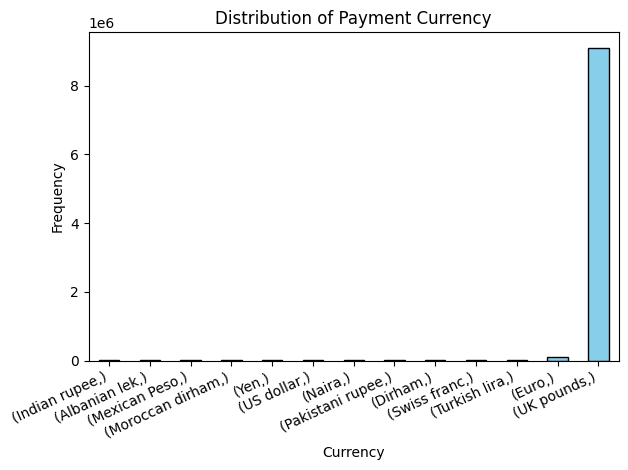

In [ ]:
df_AML[['payment_currency']].value_counts().sort_values(ascending=True).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Payment Currency')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_AML[['received_currency']].value_counts().sort_values(ascending=True)

,count
received_currency,
Turkish lira,42545
Dirham,42797
Swiss franc,42931
US dollar,43664
Indian rupee,43757
Naira,45046
Mexican Peso,45255
Albanian lek,45736
Moroccan dirham,45748


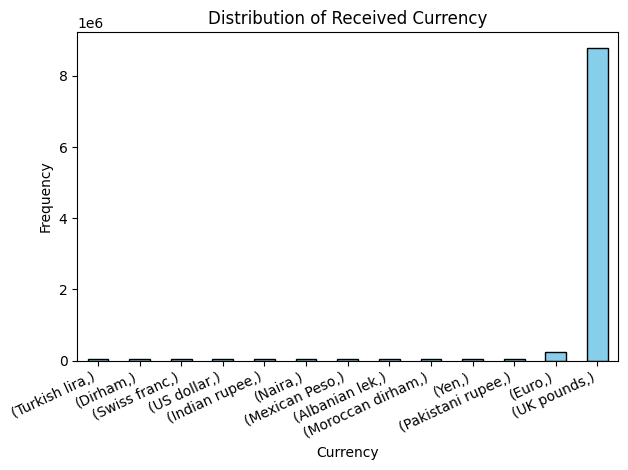

In [ ]:
df_AML[['received_currency']].value_counts().sort_values(ascending=True).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Received Currency')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_AML[['sender_bank_location']].value_counts().sort_values(ascending=True)

,count
sender_bank_location,
Netherlands,16770
India,17596
Albania,17648
Mexico,17662
Austria,18050
Morocco,18437
Japan,18468
France,18702
Italy,18895


In [ ]:
df_AML[['receiver_bank_location']].value_counts().sort_values(ascending=True)

,count
receiver_bank_location,
Turkey,35586
UAE,35897
Switzerland,36081
Italy,36517
USA,36850
India,36936
Spain,37288
Netherlands,37314
Nigeria,38272


In [ ]:
df_AML[['payment_type']].value_counts().sort_values(ascending=True)

,count
payment_type,
Cash Deposit,225206
Cash Withdrawal,300477
Cross-border,933931
ACH,2008807
Cheque,2011419
Debit card,2012103
Credit card,2012909


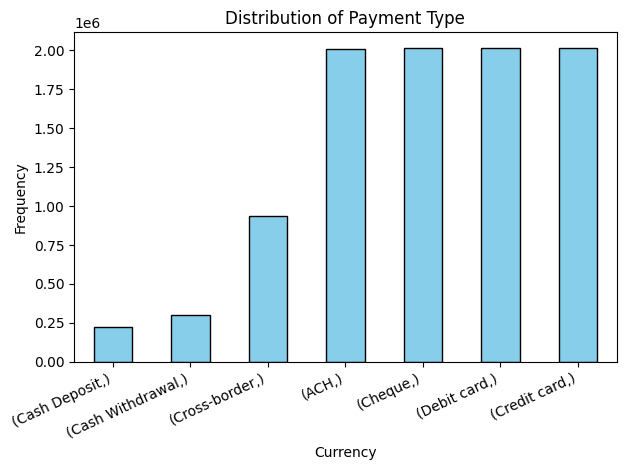

In [ ]:
df_AML[['payment_type']].value_counts().sort_values(ascending=True).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Payment Type')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_AML_type = df_AML[['laundering_type']].value_counts().sort_values(ascending=True)
df_AML_type

,count
laundering_type,
Over-Invoicing,54
Fan_Out,237
Single_large,250
Scatter-Gather,338
Behavioural_Change_2,345
Gather-Scatter,354
Fan_In,364
Cycle,382
Bipartite,383


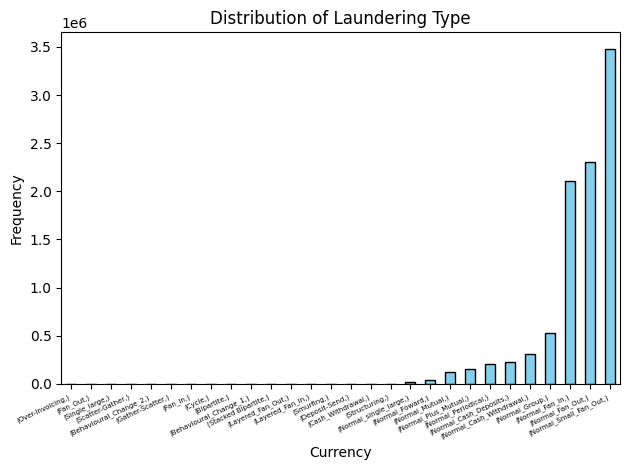

In [ ]:
df_AML[['laundering_type']].value_counts().sort_values(ascending=True).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Laundering Type')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=25, ha='right', fontsize=5)
plt.tight_layout()
plt.show()

In [ ]:
df_AML[['date']].value_counts().sort_values(ascending=True)

,count
date,
2023-08-23,8400
2022-10-07,20892
2022-10-23,23719
2022-10-30,25298
2022-12-31,25808
...,...
2022-12-23,34156
2023-02-22,34566
2023-02-06,35038


In [ ]:
df_AML1 = df_AML[['receiver_account','is_laundering']]
df_AML1

,receiver_account,is_laundering
0,2769355426,0
1,8401255335,0
2,4404767002,0
3,9600420220,0
4,3803336972,0
...,...,...
9504847,519744068,0
9504848,5416607878,0
9504849,2995527149,0
9504850,4812815165,0


# 3) Data Cleaning

In [ ]:
# handling missing values
df_AML.dropna()

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [ ]:
df_AML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   time                    object 
 1   date                    object 
 2   sender_account          int64  
 3   receiver_account        int64  
 4   amount                  float64
 5   payment_currency        object 
 6   received_currency       object 
 7   sender_bank_location    object 
 8   receiver_bank_location  object 
 9   payment_type            object 
 10  is_laundering           int64  
 11  laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [ ]:
# convert "datetime" datatype
df_AML['date'] = pd.to_datetime(df_AML['date'],format ='%Y-%m-%d')
df_AML['time'] = pd.to_datetime(df_AML['time'],format ='%H:%M:%S')
df_AML

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,1900-01-01 10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,1900-01-01 10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,1900-01-01 10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,1900-01-01 10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [ ]:
df_AML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   time                    datetime64[ns]
 1   date                    datetime64[ns]
 2   sender_account          int64         
 3   receiver_account        int64         
 4   amount                  float64       
 5   payment_currency        object        
 6   received_currency       object        
 7   sender_bank_location    object        
 8   receiver_bank_location  object        
 9   payment_type            object        
 10  is_laundering           int64         
 11  laundering_type         object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 870.2+ MB


In [ ]:
# check duplicate rows
df_AML.duplicated().value_counts()

,count
False,9504852


In [ ]:
df_AML.describe()

,time,date,sender_account,receiver_account,amount,is_laundering
count,9504852,9504852,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,1900-01-01 14:41:17.151907840,2023-03-15 21:03:37.048723968,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
min,1900-01-01 00:00:00,2022-10-07 00:00:00,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,1900-01-01 10:33:49,2022-12-27 00:00:00,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,1900-01-01 14:57:49,2023-03-15 00:00:00,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,1900-01-01 19:25:13,2023-06-03 00:00:00,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,1900-01-01 23:59:59,2023-08-23 00:00:00,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00
std,NaN,NaN,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02


In [ ]:
# handling "Nan" Value in Date
df_AML.dropna(subset=['date'])
print(df_AML['date'].isna().sum())

0


# 4) Data Transformation &  Exploratory Data Analysis (EDA)

In [ ]:
daily_transactions = df_AML.groupby(df_AML['date'].dt.to_period('D')).size()
print(daily_transactions)

sum_daily_transactions = daily_transactions.sum()
print(f" total transactons : {sum_daily_transactions}")

date
2022-10-07    20892
2022-10-08    29023
2022-10-09    28880
2022-10-10    27345
2022-10-11    28704
              ...  
2023-08-19    28206
2023-08-20    30745
2023-08-21    29094
2023-08-22    28443
2023-08-23     8400
Freq: D, Length: 321, dtype: int64
 total transactons : 9504852


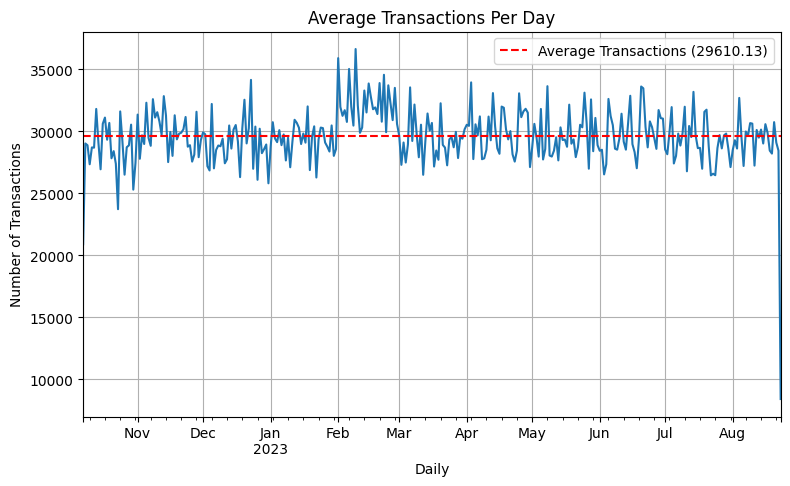

In [ ]:
# check the average transactions per day
average_daily_transactions = daily_transactions.mean()

plt.figure(figsize=(9,5))
daily_transactions.plot(kind='line')
plt.axhline(y=average_daily_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_daily_transactions:.2f})')
plt.xlabel('Daily')
plt.ylabel('Number of Transactions')
plt.title('Average Transactions Per Day')
plt.grid(True)
plt.legend()
plt.show()

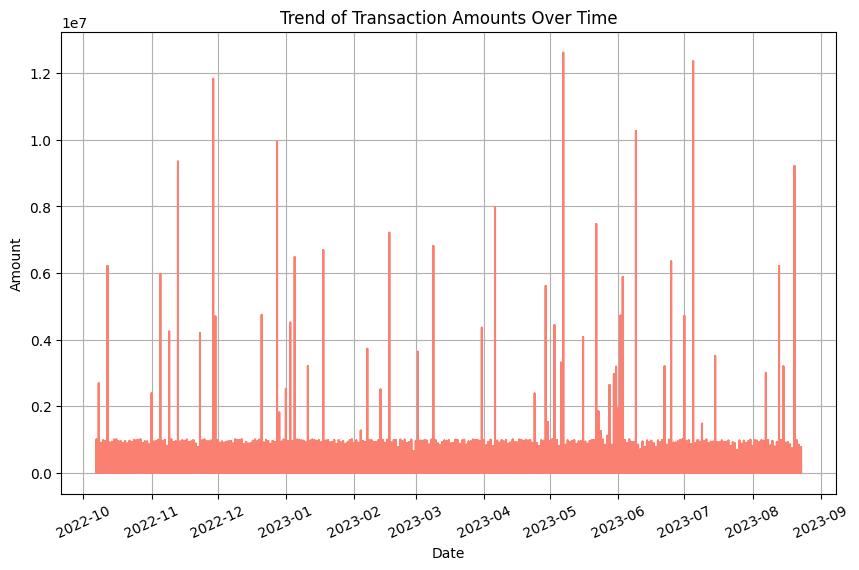

In [ ]:
# check trend of transaction amounts over time
plt.figure(figsize=(10, 6))
plt.plot(df_AML['date'],df_AML['amount'],  color='salmon')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Trend of Transaction Amounts Over Time')
plt.xticks(rotation =25)

plt.show()

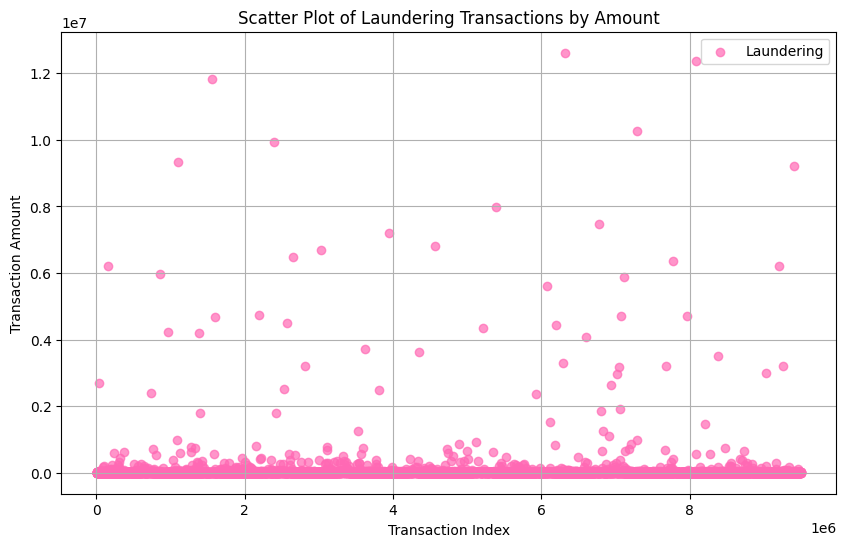

In [ ]:
# laundering transactions by amount
laundering_data = df_AML[df_AML['is_laundering'] == 1]
non_laundering_data = df_AML[df_AML['is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['amount'], color='hotpink', label='Laundering', alpha=0.7)

plt.title('Scatter Plot of Laundering Transactions by Amount')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

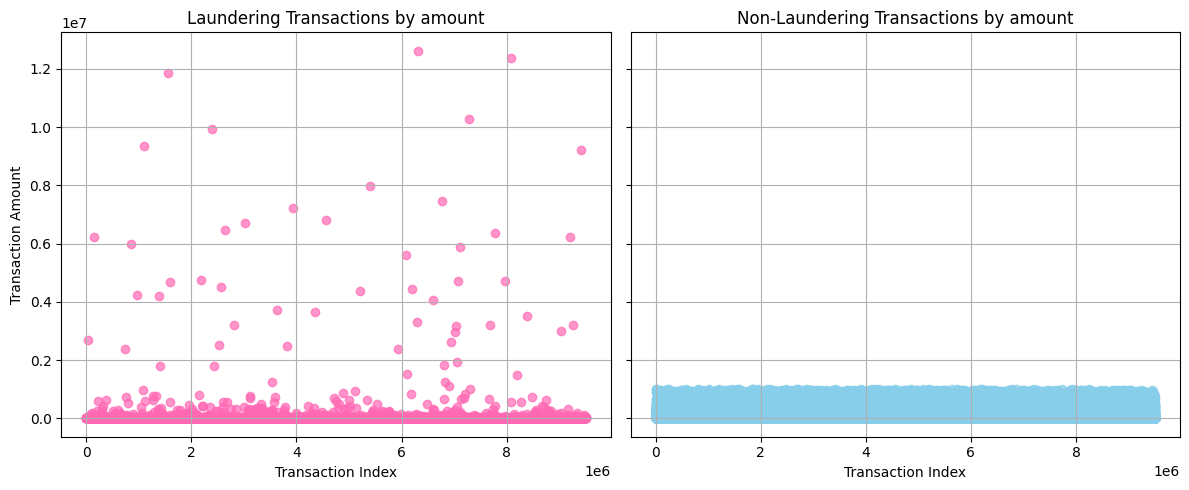

In [ ]:
# Compare between laundering and non-laundering transactions by amount
# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot laundering transactions
axes[0].scatter(laundering_data.index, laundering_data['amount'], color='hotpink', alpha=0.7)
axes[0].set_title('Laundering Transactions by amount')
axes[0].set_xlabel('Transaction Index')
axes[0].set_ylabel('Transaction Amount')
axes[0].grid(True)

# Plot non-laundering transactions
axes[1].scatter(non_laundering_data.index, non_laundering_data['amount'], color='skyblue', alpha=0.7)
axes[1].set_title('Non-Laundering Transactions by amount')
axes[1].set_xlabel('Transaction Index')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

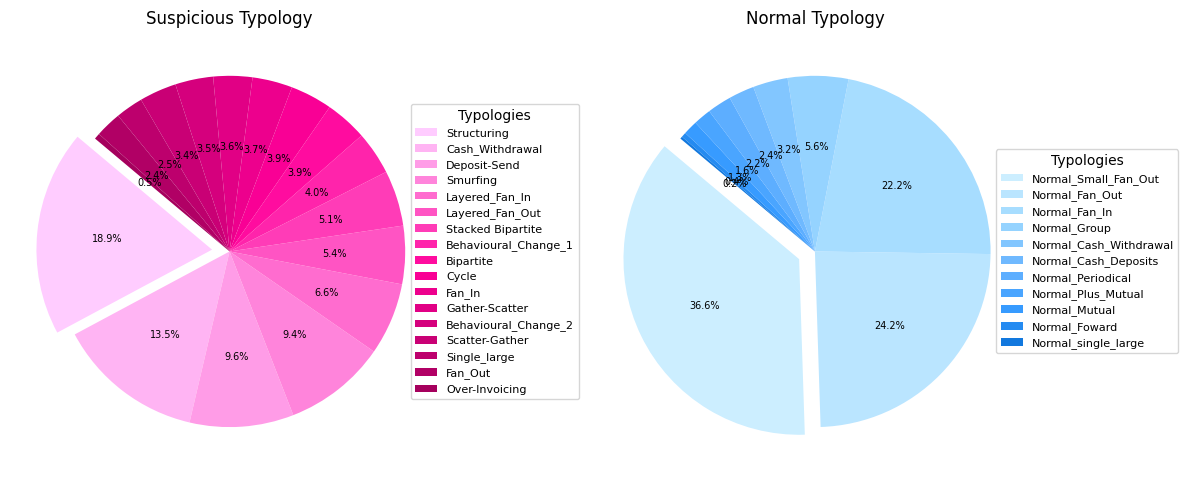

In [ ]:
# Filter the non-laundering & laundering data and count the occurrences of each type
laundering_data = df_AML[df_AML['is_laundering'] == 1]['laundering_type'].value_counts()
normal_data = df_AML[df_AML['is_laundering'] == 0]['laundering_type'].value_counts()

# Create custom color gradients
hotpink_gradient = LinearSegmentedColormap.from_list('hotpink_gradient', ['#ffccff', '#ff66cc', '#ff0099', '#cc0077', '#990055'])
blue_gradient = LinearSegmentedColormap.from_list('blue_gradient', ['#cceeff', '#99d6ff', '#66b3ff', '#3399ff', '#0066cc'])

# Generate color palettes based on the number of categories
palette_laundering = [hotpink_gradient(i / len(laundering_data)) for i in range(len(laundering_data))]
palette_normal = [blue_gradient(i / len(normal_data)) for i in range(len(normal_data))]

# Create subplots to display side-by-side pie charts with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Define the explode values for emphasizing the first slice in each pie chart
explode_laundering = [0.1] + [0] * (len(laundering_data) - 1)  # Explode the first slice of the laundering pie chart
explode_normal = [0.1] + [0] * (len(normal_data) - 1)  # Explode the first slice of the non-laundering pie chart

# Create the pie chart for laundering data
patches_laundering, texts_laundering, autotexts_laundering = axs[0].pie(
    laundering_data, explode=explode_laundering, autopct='%1.1f%%', colors=palette_laundering, startangle=140
)
axs[0].set_title('Suspicious Typology', fontsize=12)
axs[0].legend(patches_laundering, laundering_data.index, loc='center left', bbox_to_anchor=(0.9, 0.5), title="Typologies", fontsize=8)

# Create the pie chart for non-laundering data
patches_normal, texts_normal, autotexts_normal = axs[1].pie(
    normal_data, explode=explode_normal, autopct='%1.1f%%', colors=palette_normal, startangle=140
)
axs[1].set_title('Normal Typology', fontsize=12)
axs[1].legend(patches_normal, normal_data.index, loc='center left', bbox_to_anchor=(0.9, 0.5), title="Typologies", fontsize=8)

# Adjust font sizes for pie chart labels
for text in texts_laundering + autotexts_laundering + texts_normal + autotexts_normal:
    text.set_fontsize(7)

plt.tight_layout()
plt.show()

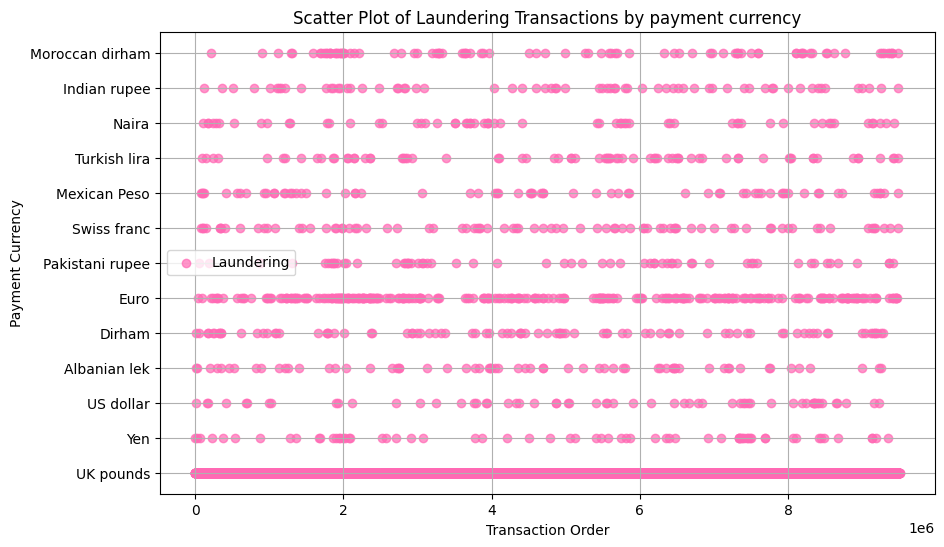

In [ ]:
# laundering transactions by currency
laundering_data = df_AML[df_AML['is_laundering'] == 1]
non_laundering_data = df_AML[df_AML['is_laundering'] == 0]
plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['payment_currency'], color='hotpink', label='Laundering', alpha=0.7)

plt.title('Scatter Plot of Laundering Transactions by payment currency')
plt.xlabel('Transaction Order')
plt.ylabel('Payment Currency')
plt.legend()
plt.grid(True)
plt.show()

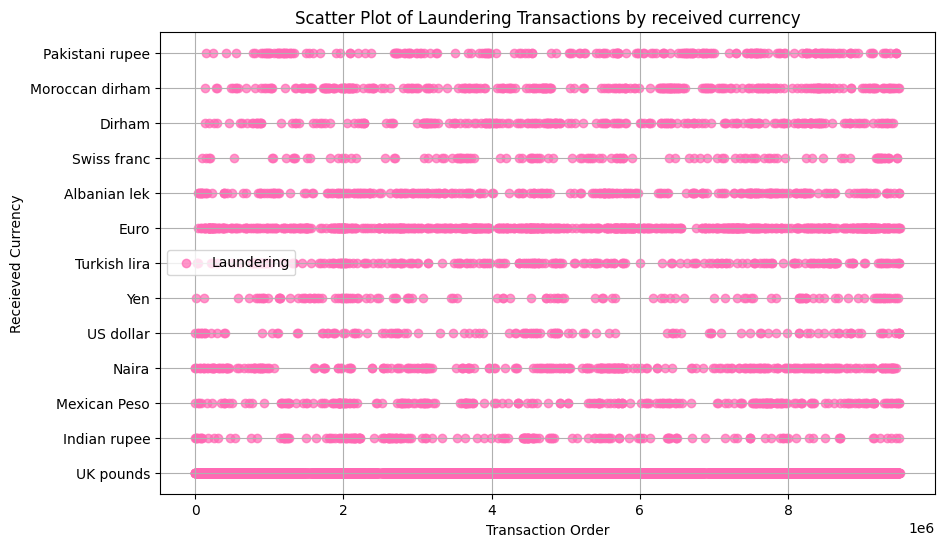

In [ ]:
# laundering transactions by currency
plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['received_currency'], color='hotpink', label='Laundering', alpha=0.7)

plt.title('Scatter Plot of Laundering Transactions by received currency')
plt.xlabel('Transaction Order')
plt.ylabel('Receieved Currency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
laundering_data


,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type
317,1900-01-01 10:46:37,2022-10-07,7401327478,4336451277,2603.300000,UK pounds,UK pounds,UK,UK,Cash Deposit,1,Smurfing
1206,1900-01-01 11:19:32,2022-10-07,6340007440,4316483340,106.040000,UK pounds,Indian rupee,UK,India,Cash Withdrawal,1,Cash_Withdrawal
1649,1900-01-01 11:35:42,2022-10-07,3758118046,6081504025,5903.330000,UK pounds,Mexican Peso,UK,Mexico,Cross-border,1,Behavioural_Change_2
1954,1900-01-01 11:45:53,2022-10-07,445154846,4497771501,3957.870000,UK pounds,Naira,UK,Nigeria,Cross-border,1,Structuring
3304,1900-01-01 12:39:03,2022-10-07,2758469152,2987279234,7832.410000,UK pounds,UK pounds,UK,UK,Debit card,1,Structuring
...,...,...,...,...,...,...,...,...,...,...,...,...
9499725,1900-01-01 07:56:34,2023-08-23,6347914836,8661825378,6702.170000,UK pounds,US dollar,UK,USA,Cross-border,1,Layered_Fan_In
9501820,1900-01-01 09:12:18,2023-08-23,9285879778,7750754,814.490000,UK pounds,Euro,UK,Austria,Cross-border,1,Behavioural_Change_1
9501946,1900-01-01 09:16:07,2023-08-23,351184098,4257557167,7888.580000,UK pounds,Turkish lira,UK,Turkey,Cross-border,1,Behavioural_Change_2
9503705,1900-01-01 10:18:07,2023-08-23,7929569569,8236488006,30061.133364,UK pounds,UK pounds,UK,UK,Credit card,1,Cycle


<ipython-input-42-5416da1f26a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laundering_data['payment_currency'] = pd.Categorical(laundering_data['payment_currency'], categories=currency_order, ordered=False)
<ipython-input-42-5416da1f26a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laundering_data['received_currency'] = pd.Categorical(laundering_data['received_currency'], categories=currency_order, ordered=False)


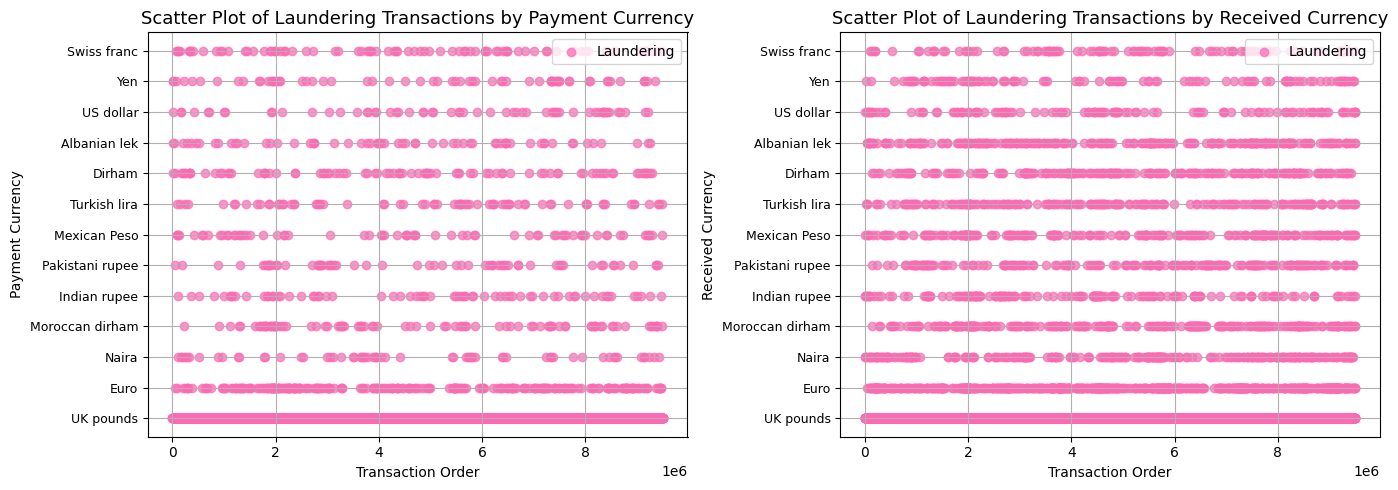

In [ ]:
# Define the consistent order of currencies
currency_order = ['UK pounds', 'Euro','Naira','Moroccan dirham','Indian rupee',
                  'Pakistani rupee', 'Mexican Peso','Turkish lira','Dirham',
                  'Albanian lek', 'US dollar', 'Yen','Swiss franc']

# Convert 'payment_currency' and 'received_currency' to categorical with the defined order
laundering_data['payment_currency'] = pd.Categorical(laundering_data['payment_currency'], categories=currency_order, ordered=False)
laundering_data['received_currency'] = pd.Categorical(laundering_data['received_currency'], categories=currency_order, ordered=False)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Scatter plot for laundering transactions by payment currency
axes[0].scatter(laundering_data.index, laundering_data['payment_currency'].cat.codes, color='hotpink', label='Laundering', alpha=0.7)
axes[0].set_title('Scatter Plot of Laundering Transactions by Payment Currency', fontsize=13)
axes[0].set_xlabel('Transaction Order')
axes[0].set_ylabel('Payment Currency')
axes[0].set_yticks(range(len(currency_order)))
axes[0].set_yticklabels(currency_order,  fontsize=9)  # Set y-axis labels based on the currency order
axes[0].legend(loc='upper right')
axes[0].grid(True)

# Scatter plot for laundering transactions by received currency
axes[1].scatter(laundering_data.index, laundering_data['received_currency'].cat.codes, color='hotpink', label='Laundering', alpha=0.7)
axes[1].set_title('Scatter Plot of Laundering Transactions by Received Currency', fontsize=13)
axes[1].set_xlabel('Transaction Order')
axes[1].set_ylabel('Received Currency')
axes[1].set_yticks(range(len(currency_order)))
axes[1].set_yticklabels(currency_order,fontsize=9)  # Set y-axis labels based on the currency order
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

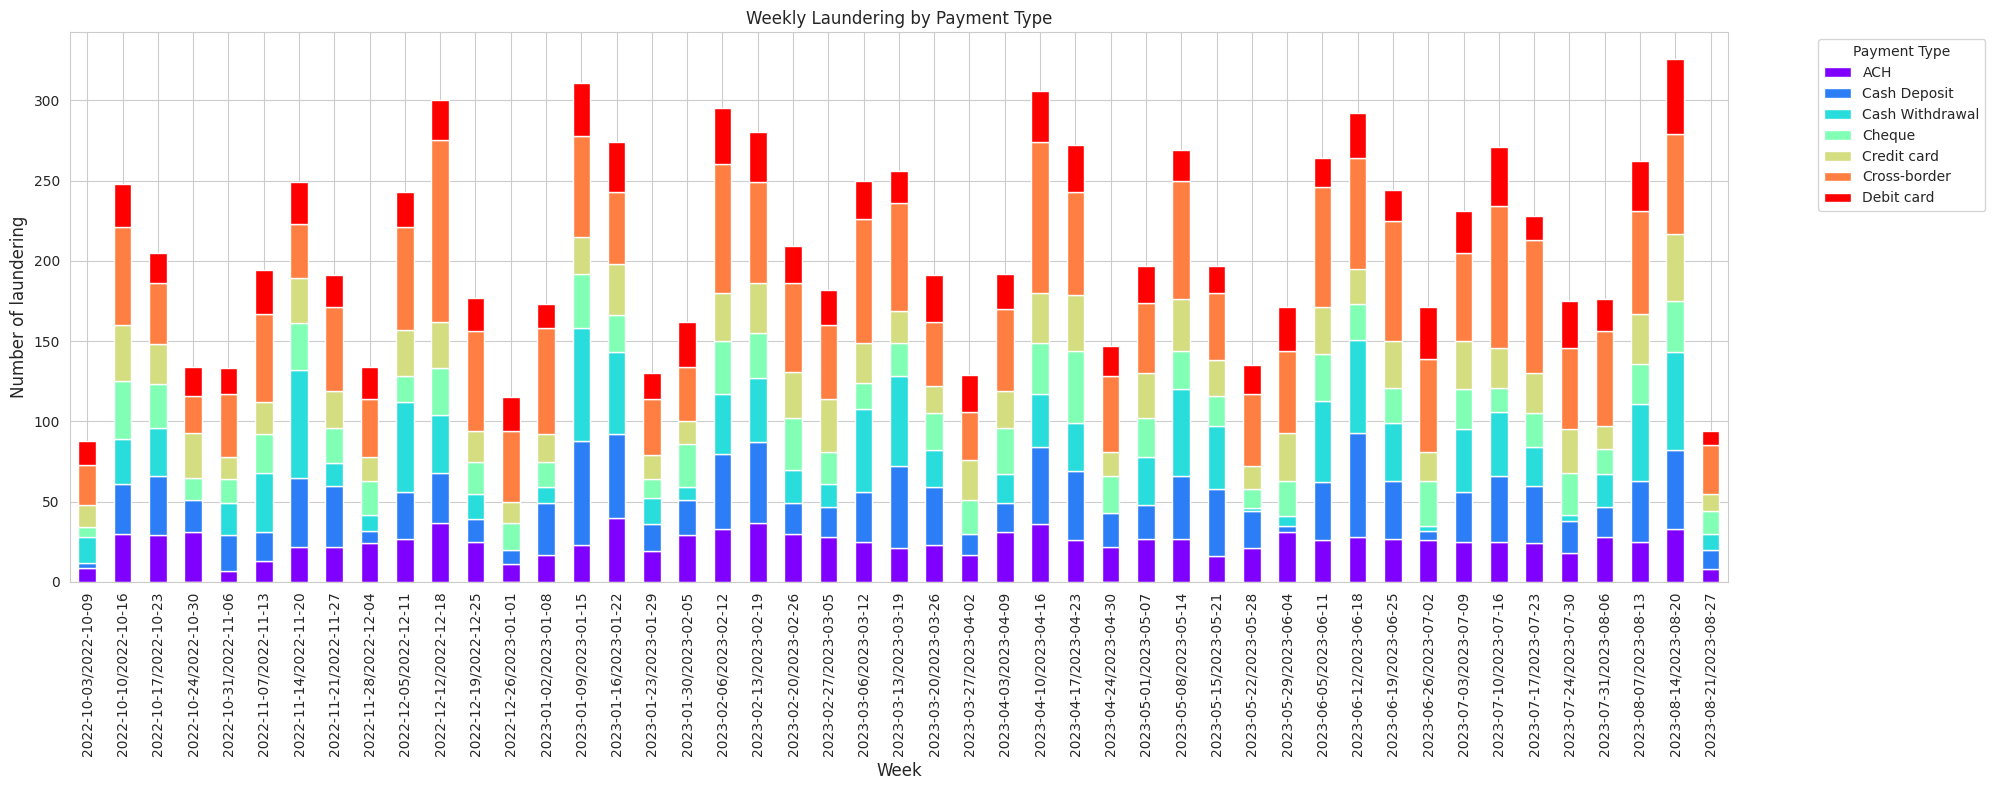

In [ ]:
# weekly lanudering per payment type
grouped_data = df_AML.groupby(['date', 'payment_type']).agg({'is_laundering': 'sum'}).reset_index()
grouped_data['weekly'] = grouped_data['date'].dt.to_period('W')
num_weekly = grouped_data.groupby(['weekly', 'payment_type']).agg({'is_laundering': 'sum'}).reset_index()

pivot_data = num_weekly.pivot(index='weekly', columns='payment_type', values='is_laundering')

sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 8))
pivot_data.plot(kind='bar', ax=ax, stacked=True, colormap='rainbow')
pivot_data = num_weekly.pivot(index='weekly', columns='payment_type', values='is_laundering')

plt.title('Weekly Laundering by Payment Type',fontsize=12)
plt.xlabel('Week',fontsize=12)
plt.ylabel('Number of laundering',fontsize=12)
plt.xticks(rotation=90, fontsize=10)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

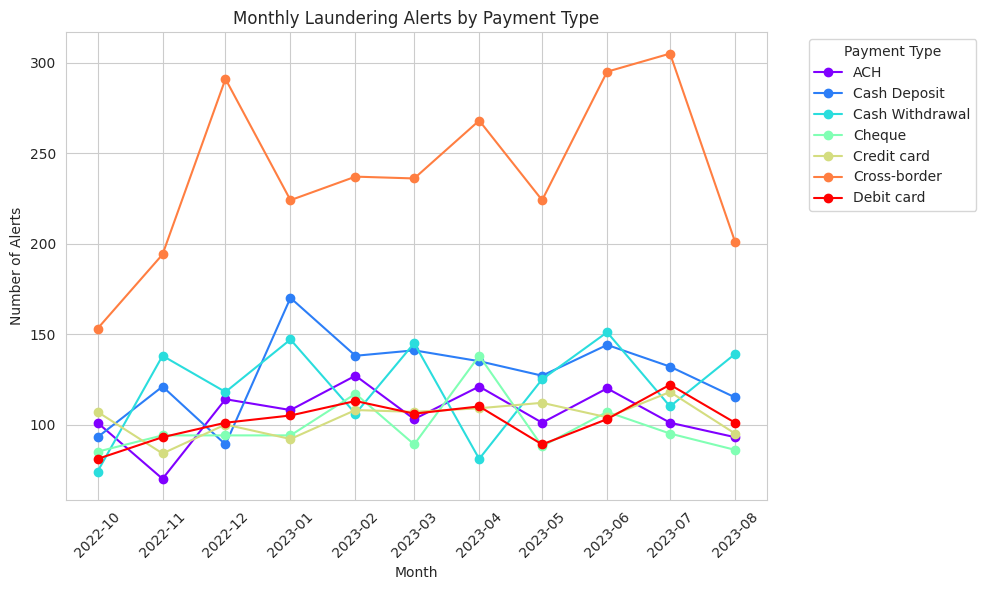

In [ ]:
# Group by monthly periods and payment type, summing the laundering alerts
grouped_data = df_AML.groupby(['date', 'payment_type']).agg({'is_laundering': 'sum'}).reset_index()

# Convert 'date' to monthly periods
grouped_data['monthly'] = grouped_data['date'].dt.to_period('M')

# Aggregate by 'monthly' and 'payment_type'
monthly_alerts = grouped_data.groupby(['monthly', 'payment_type']).agg({'is_laundering': 'sum'}).reset_index()

# Pivot data for line plotting
pivot_data = monthly_alerts.pivot(index='monthly', columns='payment_type', values='is_laundering')

# Convert the monthly index to a datetime object for better plotting
pivot_data.index = pivot_data.index.to_timestamp()

# Plot the data as a line chart
sb.set_style("whitegrid")
plt.figure(figsize=(10, 6))
# Create a rainbow colormap with enough colors for all payment types
colors = plt.cm.rainbow(np.linspace(0, 1, len(pivot_data.columns)))

# Plot each payment type as a separate line
for payment_type, color in zip(pivot_data.columns, colors):
    plt.plot(pivot_data.index, pivot_data[payment_type], label=payment_type, marker='o', color=color)

# Customize the chart
plt.title('Monthly Laundering Alerts by Payment Type')
plt.xlabel('Month')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=45)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#check unique a/c per person (as receiver and sender)

df_AML['receiver_account'].nunique()

652266

In [ ]:
df_AML['sender_account'].nunique()

292715

In [ ]:
#check all unique a/c (as one a/c can be both receiver and sender)
unique_accounts = pd.concat([df_AML['receiver_account'],df_AML['sender_account']]).nunique()

unique_accounts

855460

In [ ]:
# show distribution of each unique a/c
pd.concat([df_AML['sender_account'], df_AML['receiver_account']]).value_counts()

,count
2938210715,1498
4808614002,1491
5579295130,1490
8600542721,1489
2357599526,1481
...,...
5231099554,1
2052695205,1
1131087357,1
6664811998,1


Text(0, 0.5, 'Frequency')

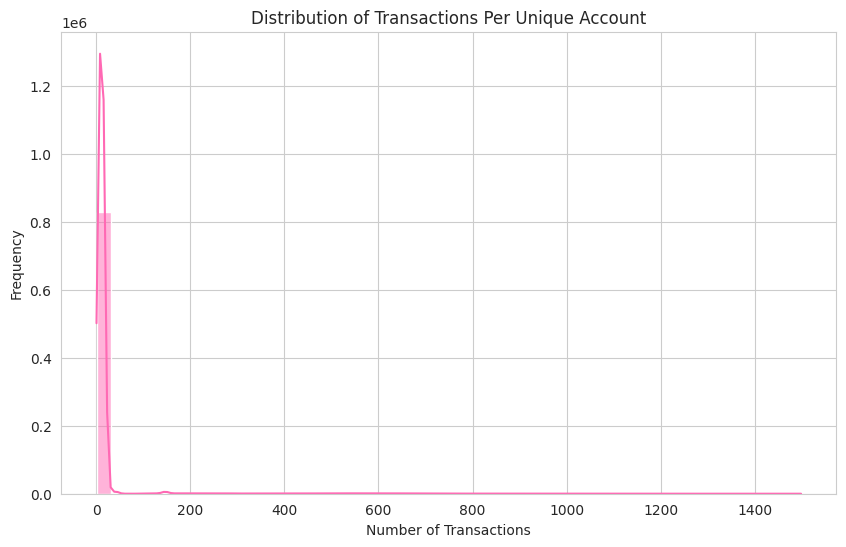

In [ ]:
#graph show distribution of each unique account and the frequent of transaction in histrogram
#unique_accounts_counts = unique_accounts.value_counts()
unique_accounts_counts = pd.concat([df_AML['sender_account'], df_AML['receiver_account']]).value_counts()

plt.figure(figsize=(10, 6))
sb.histplot(unique_accounts_counts, bins=50, kde=True, color='hotpink')
# bins: Number of histogram bins to refine the granularity, kde: Whether to show a density curve

plt.title('Distribution of Transactions Per Unique Account')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')

# 5) Feature Engineering and Feature Selection

### Encoding Categorical Variables   
(e.g. currency, bank location, payment type, launderting type, date and time )

In [ ]:
df_AML.columns

Index(['time', 'date', 'sender_account', 'receiver_account', 'amount',
       'payment_currency', 'received_currency', 'sender_bank_location',
       'receiver_bank_location', 'payment_type', 'is_laundering',
       'laundering_type'],
      dtype='object')

In [ ]:
#lable encoder for (i) currency, (ii) bank location, (iii) laundering type
label_encoder = LabelEncoder()
df_AML['payment_currency_encoded'] = label_encoder.fit_transform(df_AML['payment_currency'])
df_AML['received_currency_encoded'] = label_encoder.fit_transform(df_AML['received_currency'])
df_AML['sender_bank_location_encoded'] = label_encoder.fit_transform(df_AML['sender_bank_location'])
df_AML['receiver_bank_location_encoded'] = label_encoder.fit_transform(df_AML['receiver_bank_location'])
df_AML['laundering_type_encoded'] = label_encoder.fit_transform(df_AML['laundering_type'])

df_AML

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,1,16,15,14
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,10,16,16,20
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,10,16,16,13
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,1900-01-01 10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,10,10,16,16,20
9504848,1900-01-01 10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,10,10,16,16,20
9504849,1900-01-01 10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,10,10,16,16,20
9504850,1900-01-01 10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,10,16,16,13


In [ ]:
# mapping label encoder with original label (as for reference)  # reset index to convert to a DataFrame
df_AML[['payment_currency', 'payment_currency_encoded']].value_counts().reset_index(name='count')\
                                                        .sort_values(by='payment_currency_encoded', ascending=True)

,payment_currency,payment_currency_encoded,count
11,Albanian lek,0,24778
4,Dirham,1,27263
1,Euro,2,117164
12,Indian rupee,3,24657
10,Mexican Peso,4,24852
9,Moroccan dirham,5,25395
6,Naira,6,27143
5,Pakistani rupee,7,27196
3,Swiss franc,8,27492
2,Turkish lira,9,27996


In [ ]:
df_AML[['received_currency', 'received_currency_encoded']].value_counts().reset_index(name='count')\
                                                        .sort_values(by='received_currency_encoded', ascending=True)

,received_currency,received_currency_encoded,count
5,Albanian lek,0,45736
11,Dirham,1,42797
1,Euro,2,231911
8,Indian rupee,3,43757
6,Mexican Peso,4,45255
4,Moroccan dirham,5,45748
7,Naira,6,45046
2,Pakistani rupee,7,45993
10,Swiss franc,8,42931
12,Turkish lira,9,42545


In [ ]:
df_AML[['receiver_bank_location', 'receiver_bank_location_encoded']].value_counts().reset_index(name='count')\
                                                        .sort_values(by='receiver_bank_location_encoded', ascending=True)

,receiver_bank_location,receiver_bank_location_encoded,count
3,Albania,0,38783
2,Austria,1,38844
7,France,2,38512
6,Germany,3,38540
12,India,4,36936
14,Italy,5,36517
4,Japan,6,38729
8,Mexico,7,38385
5,Morocco,8,38704
10,Netherlands,9,37314


In [ ]:
df_AML[['sender_bank_location', 'sender_bank_location_encoded']].value_counts().reset_index(name='count')\
                                                        .sort_values(by='sender_bank_location_encoded', ascending=True)

,sender_bank_location,sender_bank_location_encoded,count
15,Albania,0,17648
13,Austria,1,18050
10,France,2,18702
7,Germany,3,19259
16,India,4,17596
9,Italy,5,18895
11,Japan,6,18468
14,Mexico,7,17662
12,Morocco,8,18437
17,Netherlands,9,16770


In [ ]:
df_AML[['laundering_type', 'laundering_type_encoded']].value_counts().reset_index()\
                                                      .sort_values(by='laundering_type_encoded',ascending=True)

,laundering_type,laundering_type_encoded,count
18,Behavioural_Change_1,0,394
23,Behavioural_Change_2,1,345
19,Bipartite,2,383
12,Cash_Withdrawal,3,1334
20,Cycle,4,382
13,Deposit-Send,5,945
21,Fan_In,6,364
26,Fan_Out,7,237
22,Gather-Scatter,8,354
15,Layered_Fan_In,9,656


In [ ]:
# convert "date" to "day_of_week" and map to integer
df_AML['day_of_week'] = df_AML['date'].dt.day_name()

day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_AML['day_of_week_encoded'] = df_AML['day_of_week'].map(day_mapping)
df_AML

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week,day_of_week_encoded
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11,Friday,4
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,1,16,15,14,Friday,4
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,10,16,16,20,Friday,4
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,10,16,16,13,Friday,4
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,1900-01-01 10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,10,10,16,16,20,Wednesday,2
9504848,1900-01-01 10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,10,10,16,16,20,Wednesday,2
9504849,1900-01-01 10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,10,10,16,16,20,Wednesday,2
9504850,1900-01-01 10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,10,16,16,13,Wednesday,2


In [ ]:
df_AML[['day_of_week', 'day_of_week_encoded']].value_counts()\
                                              .reset_index().sort_values(by='day_of_week_encoded',ascending=True)

,day_of_week,day_of_week_encoded,count
0,Monday,0,1389246
2,Tuesday,1,1369343
3,Wednesday,2,1366034
4,Thursday,3,1350706
1,Friday,4,1369872
5,Saturday,5,1336623
6,Sunday,6,1323028


In [ ]:
# create 'hour' feature
df_AML['hour'] = df_AML['time'].dt.hour

df_AML.head()

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,is_laundering,laundering_type,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week,day_of_week_encoded,hour
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11,Friday,4,10
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,1,16,15,14,Friday,4,10
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,10,16,16,20,Friday,4,10
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,10,16,16,13,Friday,4,10
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,10,16,16,11,Friday,4,10


In [ ]:
df_AML[['hour']].value_counts(). reset_index().sort_values(by='hour', ascending=True)

,hour,count
21,0,121548
18,1,121964
19,2,121627
23,3,121282
20,4,121568
17,5,122114
22,6,121484
16,7,142497
8,8,538992
7,9,539044


In [ ]:
df_AML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 20 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   date                            datetime64[ns]
 2   sender_account                  int64         
 3   receiver_account                int64         
 4   amount                          float64       
 5   payment_currency                object        
 6   received_currency               object        
 7   sender_bank_location            object        
 8   receiver_bank_location          object        
 9   payment_type                    object        
 10  is_laundering                   int64         
 11  laundering_type                 object        
 12  payment_currency_encoded        int64         
 13  received_currency_encoded       int64         
 14  sender_bank_location_encoded    int64         
 15

In [ ]:
#convert 'time' to 'time of day' by extracting hour & define it as Morning(5.00-11.59), Afternoon(12.00-16.59), Evening(17.00-20.59) or Night(21.00-4.59)

def define_time_of_day(t):
    hour = t.hour

    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df_AML['time_of_day'] = df_AML['time'].apply(define_time_of_day)

df_AML.head()

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,...,laundering_type,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week,day_of_week_encoded,hour,time_of_day
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,...,Normal_Cash_Deposits,10,10,16,16,11,Friday,4,10,Morning
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,...,Normal_Fan_Out,10,1,16,15,14,Friday,4,10,Morning
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,...,Normal_Small_Fan_Out,10,10,16,16,20,Friday,4,10,Morning
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,...,Normal_Fan_In,10,10,16,16,13,Friday,4,10,Morning
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,...,Normal_Cash_Deposits,10,10,16,16,11,Friday,4,10,Morning


In [ ]:
# map 'time of day' to integer
time_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
df_AML['time_of_day_encoded'] = df_AML['time_of_day'].map(time_mapping)
df_AML.head()

,time,date,sender_account,receiver_account,amount,payment_currency,received_currency,sender_bank_location,receiver_bank_location,payment_type,...,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week,day_of_week_encoded,hour,time_of_day,time_of_day_encoded
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,...,10,10,16,16,11,Friday,4,10,Morning,0
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,...,10,1,16,15,14,Friday,4,10,Morning,0
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,...,10,10,16,16,20,Friday,4,10,Morning,0
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,...,10,10,16,16,13,Friday,4,10,Morning,0
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,...,10,10,16,16,11,Friday,4,10,Morning,0


In [ ]:
df_AML[['time_of_day', 'time_of_day_encoded']].value_counts()\
                                              .reset_index().sort_values(by='time_of_day_encoded',ascending=True)

,time_of_day,time_of_day_encoded,count
1,Morning,0,2543974
0,Afternoon,1,2699060
3,Evening,2,2096427
2,Night,3,2165391


In [ ]:
df_AML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   date                            datetime64[ns]
 2   sender_account                  int64         
 3   receiver_account                int64         
 4   amount                          float64       
 5   payment_currency                object        
 6   received_currency               object        
 7   sender_bank_location            object        
 8   receiver_bank_location          object        
 9   payment_type                    object        
 10  is_laundering                   int64         
 11  laundering_type                 object        
 12  payment_currency_encoded        int64         
 13  received_currency_encoded       int64         
 14  sender_bank_location_encoded    int64         
 15

### Create new DataFrame with chronological transaction flows for each unique account ID

In [ ]:
# create DataFrames for unique account with chronological flow (both sender & receiver)

df_sender = df_AML[['sender_account','time', 'date', 'amount','is_laundering','payment_currency_encoded',\
                    'received_currency_encoded','sender_bank_location_encoded','receiver_bank_location_encoded',\
                    'laundering_type_encoded','day_of_week_encoded','hour','time_of_day_encoded','receiver_account']].copy()
df_sender = df_sender.rename(columns={'sender_account': 'account'})
df_sender['transaction_type'] = 'sent'

df_sender = df_sender.rename(columns={'receiver_account':'account_interaction'})

df_sender = df_sender.sort_values(by=['account', 'date','time'])
df_sender

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type
8572082,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent
3210514,28511,1900-01-01 23:28:15,2023-01-24,6371.25,0,10,10,16,16,19,1,23,3,3072405466,sent
4191567,28511,1900-01-01 23:31:38,2023-02-24,3878.00,0,10,10,16,16,19,4,23,3,3072405466,sent
5018226,28511,1900-01-01 20:51:59,2023-03-24,4109.92,0,10,10,16,16,19,4,20,2,3072405466,sent
5938108,28511,1900-01-01 19:38:10,2023-04-24,7147.58,0,10,10,16,16,19,0,19,2,3072405466,sent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483420,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,3,18,2,2812722257,sent
7485577,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,3,19,2,2812722257,sent
7487475,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,3,20,2,2812722257,sent
7488709,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,3,21,3,2812722257,sent


In [ ]:
df_receiver = df_AML[['receiver_account','time', 'date', 'amount','is_laundering','payment_currency_encoded',\
                    'received_currency_encoded','sender_bank_location_encoded','receiver_bank_location_encoded',\
                    'laundering_type_encoded','day_of_week_encoded','hour','time_of_day_encoded','sender_account']].copy()
df_receiver = df_receiver.rename(columns={'receiver_account': 'account'})
df_receiver['transaction_type'] = 'received'

df_receiver = df_receiver.rename(columns={'sender_account': 'account_interaction'})

df_receiver = df_receiver.sort_values(by=['account','date', 'time'])
df_receiver

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type
8562799,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received
1420882,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received
1753672,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received
2850709,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received
3186386,13266,1900-01-01 09:13:08,2023-01-24,1043.72,0,10,10,16,16,20,1,9,0,2595228252,received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200086,9999971095,1900-01-01 11:45:46,2023-05-03,4607.86,0,10,10,16,16,20,2,11,0,7267454854,received
8235911,9999971095,1900-01-01 21:17:42,2023-07-10,5033.27,0,10,10,16,16,20,0,21,3,7267454854,received
8669286,9999971095,1900-01-01 20:28:23,2023-07-25,4755.19,0,10,4,16,16,20,1,20,2,7267454854,received
8799403,9999971095,1900-01-01 10:29:42,2023-07-30,4323.83,0,10,10,16,16,20,6,10,0,7267454854,received


In [ ]:
#combine chronologically by account of above 2 new DataFrames together

df_combined_accounts = pd.concat([df_sender, df_receiver], ignore_index=True)
df_combined_accounts = df_combined_accounts.sort_values(by=['account','date', 'time'])
df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,3,18,2,2812722257,sent
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,3,19,2,2812722257,sent
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,3,20,2,2812722257,sent
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,3,21,3,2812722257,sent


In [ ]:
df_combined_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19009704 entries, 9504852 to 9504851
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   account                         int64         
 1   time                            datetime64[ns]
 2   date                            datetime64[ns]
 3   amount                          float64       
 4   is_laundering                   int64         
 5   payment_currency_encoded        int64         
 6   received_currency_encoded       int64         
 7   sender_bank_location_encoded    int64         
 8   receiver_bank_location_encoded  int64         
 9   laundering_type_encoded         int64         
 10  day_of_week_encoded             int64         
 11  hour                            int32         
 12  time_of_day_encoded             int64         
 13  account_interaction             int64         
 14  transaction_type                object        
d

In [ ]:
df_combined_accounts.describe()

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction
count,1.900970e+07,19009704,19009704,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07,1.900970e+07
mean,5.006313e+09,1900-01-01 14:41:17.151905024,2023-03-15 21:03:37.048724224,8.762968e+03,1.038733e-03,9.781680e+00,9.598556e+00,1.573733e+01,1.545880e+01,1.617889e+01,2.972619e+00,1.418820e+01,1.408553e+00,5.006313e+09
min,9.018000e+03,1900-01-01 00:00:00,2022-10-07 00:00:00,3.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.018000e+03
25%,2.513133e+09,1900-01-01 10:33:49,2022-12-27 00:00:00,2.143688e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.600000e+01,1.600000e+01,1.300000e+01,1.000000e+00,1.000000e+01,0.000000e+00,2.513133e+09
50%,5.001695e+09,1900-01-01 14:57:49,2023-03-15 00:00:00,6.113720e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.600000e+01,1.600000e+01,1.400000e+01,3.000000e+00,1.400000e+01,1.000000e+00,5.001695e+09
75%,7.503758e+09,1900-01-01 19:25:13,2023-06-03 00:00:00,1.045846e+04,0.000000e+00,1.000000e+01,1.000000e+01,1.600000e+01,1.600000e+01,2.000000e+01,5.000000e+00,1.900000e+01,2.000000e+00,7.503758e+09
max,9.999987e+09,1900-01-01 23:59:59,2023-08-23 00:00:00,1.261850e+07,1.000000e+00,1.200000e+01,1.200000e+01,1.700000e+01,1.700000e+01,2.700000e+01,6.000000e+00,2.300000e+01,3.000000e+00,9.999987e+09
std,2.885288e+09,NaN,NaN,2.561495e+04,3.221263e-02,1.273485e+00,1.711549e+00,1.678859e+00,2.393672e+00,3.211784e+00,1.998519e+00,5.714591e+00,1.110215e+00,2.885288e+09


In [ ]:
df_combined_accounts.duplicated().value_counts()

,count
False,19009704


### Calculate the time interval between each transaction in the flow for each account ID

In [ ]:
#combine date+time together before finding 'time interval' for each a/c

df_combined_accounts['time2'] = df_combined_accounts['time'].dt.time #delete default date '1900-01-01' in 'time'

df_combined_accounts['datetime'] = df_combined_accounts['date'].astype(str) + ' ' + df_combined_accounts['time2'].astype(str)

df_combined_accounts['datetime'] = pd.to_datetime(df_combined_accounts['datetime'], format='%Y-%m-%d %H:%M:%S')
df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type,time2,datetime
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received,21:32:35,2023-07-21 21:32:35
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent,09:51:28,2023-07-22 09:51:28
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received,16:20:16,2022-11-24 16:20:16
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received,04:28:33,2022-12-06 04:28:33
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received,19:44:39,2023-01-12 19:44:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,3,18,2,2812722257,sent,18:33:08,2023-06-15 18:33:08
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,3,19,2,2812722257,sent,19:46:17,2023-06-15 19:46:17
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,3,20,2,2812722257,sent,20:48:31,2023-06-15 20:48:31
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,3,21,3,2812722257,sent,21:29:01,2023-06-15 21:29:01


In [ ]:
df_combined_accounts['time_interval'] = df_combined_accounts.groupby('account')['datetime'].diff()

df_combined_accounts.head()

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type,time2,datetime,time_interval
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received,21:32:35,2023-07-21 21:32:35,NaT
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent,09:51:28,2023-07-22 09:51:28,0 days 12:18:53
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received,16:20:16,2022-11-24 16:20:16,NaT
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received,04:28:33,2022-12-06 04:28:33,11 days 12:08:17
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received,19:44:39,2023-01-12 19:44:39,37 days 15:16:06


In [ ]:
df_combined_accounts['time_interval'].describe()

,time_interval
count,18154244
mean,5 days 16:04:28.586209209
std,15 days 19:41:56.927240662
min,0 days 00:00:00
25%,0 days 00:15:01
50%,0 days 03:07:59
75%,2 days 03:21:43
max,316 days 22:44:25


In [ ]:
df_combined_accounts['time_interval'].sort_values(ascending=True)

,time_interval
16932115,0 days
18731778,0 days
6072579,0 days
13454356,0 days
13236611,0 days
...,...
19009661,NaT
19009672,NaT
19009685,NaT
19009688,NaT


In [ ]:
df_combined_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19009704 entries, 9504852 to 9504851
Data columns (total 18 columns):
 #   Column                          Dtype          
---  ------                          -----          
 0   account                         int64          
 1   time                            datetime64[ns] 
 2   date                            datetime64[ns] 
 3   amount                          float64        
 4   is_laundering                   int64          
 5   payment_currency_encoded        int64          
 6   received_currency_encoded       int64          
 7   sender_bank_location_encoded    int64          
 8   receiver_bank_location_encoded  int64          
 9   laundering_type_encoded         int64          
 10  day_of_week_encoded             int64          
 11  hour                            int32          
 12  time_of_day_encoded             int64          
 13  account_interaction             int64          
 14  transaction_type                

### Encoding 'transaction type'


In [ ]:
# encoding "transaction type"
df_combined_accounts['transaction_type_encoded'] = df_combined_accounts['transaction_type'].map({'sent': 0, 'received': 1})
df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type,time2,datetime,time_interval,transaction_type_encoded
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received,21:32:35,2023-07-21 21:32:35,NaT,1
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent,09:51:28,2023-07-22 09:51:28,0 days 12:18:53,0
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received,16:20:16,2022-11-24 16:20:16,NaT,1
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received,04:28:33,2022-12-06 04:28:33,11 days 12:08:17,1
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received,19:44:39,2023-01-12 19:44:39,37 days 15:16:06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,3,18,2,2812722257,sent,18:33:08,2023-06-15 18:33:08,0 days 01:17:23,0
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,3,19,2,2812722257,sent,19:46:17,2023-06-15 19:46:17,0 days 01:13:09,0
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,3,20,2,2812722257,sent,20:48:31,2023-06-15 20:48:31,0 days 01:02:14,0
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,3,21,3,2812722257,sent,21:29:01,2023-06-15 21:29:01,0 days 00:40:30,0


### Encoding 'account_interaction' and 'account'

check data distribution

In [ ]:
account_interaction_counts = df_combined_accounts['account_interaction'].value_counts()
account_interaction_counts


,count
account_interaction,
2938210715,1498
4808614002,1491
5579295130,1490
8600542721,1489
2357599526,1481
...,...
9361095428,1
9817433761,1
3807680517,1


In [ ]:
account_interaction_counts.describe()

,count
count,855460.000000
mean,22.221616
std,77.193688
min,1.000000
25%,9.000000
50%,12.000000
75%,13.000000
max,1498.000000


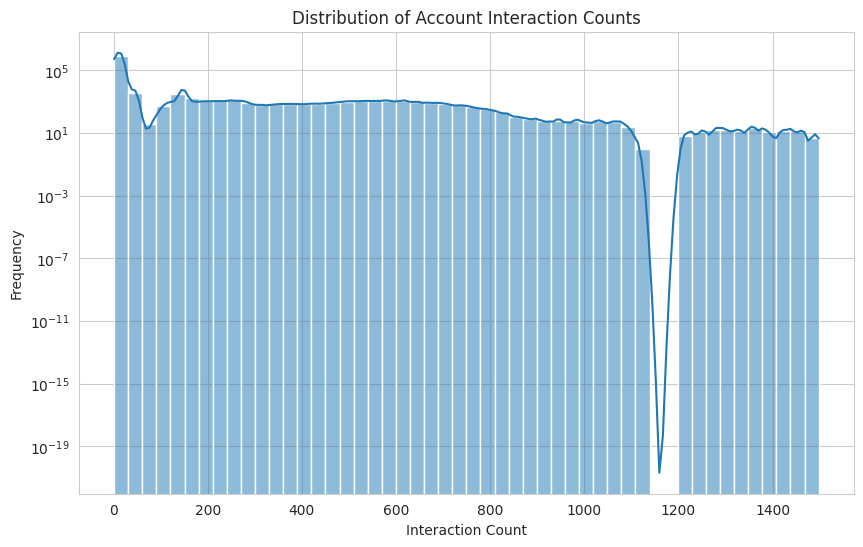

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(account_interaction_counts, bins=50, kde=True)
# bins: Number of histogram bins, kde: Whether to show a density curve

plt.title('Distribution of Account Interaction Counts')
plt.xlabel('Interaction Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a log scale on the y-axis to handle large variations in counts
plt.show()

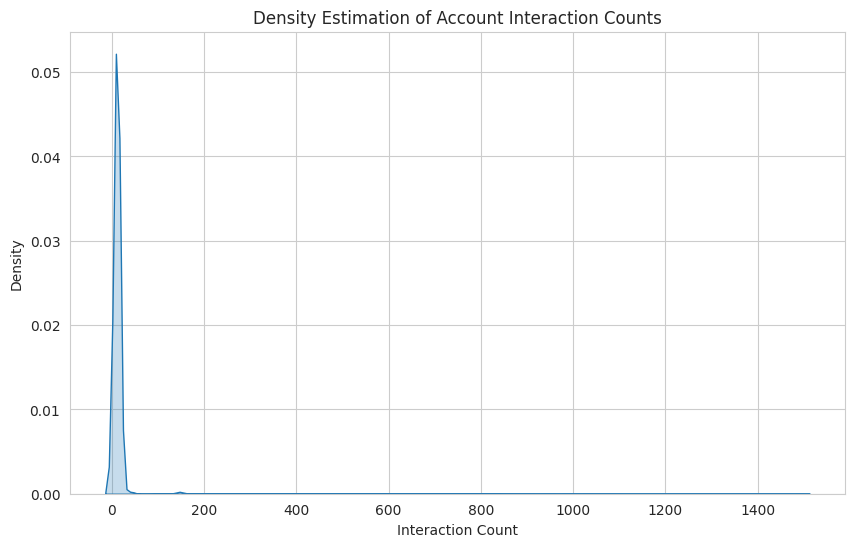

In [ ]:
plt.figure(figsize=(10, 6))
sb.kdeplot(account_interaction_counts, fill=True)

plt.title('Density Estimation of Account Interaction Counts')
plt.xlabel('Interaction Count')
plt.ylabel('Density')
plt.show()

In [ ]:
# Filter accounts with counts greater than certain times (to reduce the encoding numbers, also ignore the significant low activity a.c)

times = 20
filtered_counts = account_interaction_counts[account_interaction_counts > times]

# Get the number of such accounts
num_accounts_above = len(filtered_counts)
num_accounts_above

print(f"Number of accounts with interaction counts > {times} : {num_accounts_above} accounts")

Number of accounts with interaction counts > 20 : 43556 accounts


In [ ]:
# separate the account_interaction > 20 transactions
account_interaction_ft = account_interaction_counts[account_interaction_counts > times]
account_interaction_ft

,count
account_interaction,
2938210715,1498
4808614002,1491
5579295130,1490
8600542721,1489
2357599526,1481
...,...
4654143554,21
6881389194,21
3811605615,21


In [ ]:
# separate the rest of account_interaction that <= 20 and named as others
account_interaction_others = account_interaction_counts[account_interaction_counts <= times]
account_interaction_others

,count
account_interaction,
7332303366,20
1191959173,20
5307534407,20
787404355,20
4317459773,20
...,...
9361095428,1
9817433761,1
3807680517,1


In [ ]:
# encode by adding a new column 'account_interaction_encoded'
df_combined_accounts['account_interaction_encoded'] = df_combined_accounts['account_interaction'].apply(
    lambda x: x if x in account_interaction_ft else 'account_others')

label_encoder = LabelEncoder()

# Separate encoding for 'account_interaction_ft' with unique integer values & (Encode the filtered accounts only, starting from 1)
filtered_accounts = df_combined_accounts['account_interaction_encoded'][
    df_combined_accounts['account_interaction_encoded'] != 'account_others']
encoded_values = label_encoder.fit_transform(filtered_accounts) + 1

# Assign the encoded values back to the DataFrame
df_combined_accounts.loc[df_combined_accounts['account_interaction_encoded'] != 'account_others', 'account_interaction_encoded'] = encoded_values

# Set 'account_others' to 0
df_combined_accounts.loc[df_combined_accounts['account_interaction_encoded'] == 'account_others', 'account_interaction_encoded'] = 0

# Convert to numeric for downstream processing
df_combined_accounts['account_interaction_encoded'] = pd.to_numeric(df_combined_accounts['account_interaction_encoded'])

df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,day_of_week_encoded,hour,time_of_day_encoded,account_interaction,transaction_type,time2,datetime,time_interval,transaction_type_encoded,account_interaction_encoded
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,4,21,3,6080420349,received,21:32:35,2023-07-21 21:32:35,NaT,1,26377
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,5,9,0,2388293593,sent,09:51:28,2023-07-22 09:51:28,0 days 12:18:53,0,0
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,3,16,1,2595228252,received,16:20:16,2022-11-24 16:20:16,NaT,1,11232
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,1,4,3,2595228252,received,04:28:33,2022-12-06 04:28:33,11 days 12:08:17,1,11232
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,3,19,2,2595228252,received,19:44:39,2023-01-12 19:44:39,37 days 15:16:06,1,11232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,3,18,2,2812722257,sent,18:33:08,2023-06-15 18:33:08,0 days 01:17:23,0,12177
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,3,19,2,2812722257,sent,19:46:17,2023-06-15 19:46:17,0 days 01:13:09,0,12177
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,3,20,2,2812722257,sent,20:48:31,2023-06-15 20:48:31,0 days 01:02:14,0,12177
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,3,21,3,2812722257,sent,21:29:01,2023-06-15 21:29:01,0 days 00:40:30,0,12177


In [ ]:
df_combined_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19009704 entries, 9504852 to 9504851
Data columns (total 20 columns):
 #   Column                          Dtype          
---  ------                          -----          
 0   account                         int64          
 1   time                            datetime64[ns] 
 2   date                            datetime64[ns] 
 3   amount                          float64        
 4   is_laundering                   int64          
 5   payment_currency_encoded        int64          
 6   received_currency_encoded       int64          
 7   sender_bank_location_encoded    int64          
 8   receiver_bank_location_encoded  int64          
 9   laundering_type_encoded         int64          
 10  day_of_week_encoded             int64          
 11  hour                            int32          
 12  time_of_day_encoded             int64          
 13  account_interaction             int64          
 14  transaction_type                

In [ ]:
# show only account_interaction_encoded are equal to 0
df_combined_accounts[df_combined_accounts['account_interaction_encoded'] == 0].value_counts().sort_values(ascending=True)


account     time                 date        amount    is_laundering  payment_currency_encoded  received_currency_encoded  sender_bank_location_encoded  receiver_bank_location_encoded  laundering_type_encoded  day_of_week_encoded  hour  time_of_day_encoded  account_interaction  transaction_type  time2     datetime             time_interval    transaction_type_encoded  account_interaction_encoded
9018        1900-01-01 09:51:28  2023-07-22  3319.06   0              10                        2                          16                            3                               15                       5                    9     0                    2388293593           sent              09:51:28  2023-07-22 09:51:28  0 days 12:18:53  0                         0                              1
92172       1900-01-01 01:59:02  2023-04-17  131.30    0              10                        10                         16                            16                              20                       0                    1     3                    8852709889           sent              01:59:02  2023-04-17 01:59:02  1 days 21:16:34  0                         0                              1
            1900-01-01 02:04:34  2022-11-19  74.97     0              10                        10                         16                            16                              20                       5                    2     3                    8852709889           sent              02:04:34  2022-11-19 02:04:34  0 days 14:45:32  0                         0                              1
            1900-01-01 02:09:45  2023-08-12  15914.23  0              10                        10                         16                            16                              20                       5                    2     3                    4313918250           sent              02:09:45  2023-08-12 02:09:45  0 days 03:09:44  0                         0                              1
            1900-01-01 02:10:19  2022-11-19  370.24    0              10                        10                         16                            16                              20                       5                    2     3                    3718894533           sent              02:10:19  2022-11-19 02:10:19  0 days 00:05:45  0                         0                              1
                                                                                                                                                                                                                                                                                                                                                                                                                 ..
9999156867  1900-01-01 14:52:53  2023-04-02  81.26     0              10                        10                         16                            16                              20                       6                    14    1                    2858684663           sent              14:52:53  2023-04-02 14:52:53  8 days 21:53:43  0                         0                              1
            1900-01-01 22:20:20  2023-05-23  14306.76  0              6                         10                         10                            16                              14                       1                    22    3                    8852701392           sent              22:20:20  2023-05-23 22:20:20  0 days 00:05:53  0                         0                              1
            1900-01-01 22:09:18  2023-04-16  90.63     0              10                        10                         16                            16                              20                       6                    22    3                    2858684663           sent              22:09:18  2023-04-16 22:09:18  4 days 10:09:42  0                       

In [ ]:
# Recheck - the unique accounts encoded as 0
accounts_encoded_with_zero = df_combined_accounts[df_combined_accounts['account_interaction_encoded'] == 0]['account_interaction'].unique()

# Count the number of unique accounts encoded as 0
num_unique_accounts_with_zero = len(accounts_encoded_with_zero)
print(f"Number of unique accounts encoded as '0': {num_unique_accounts_with_zero}")

print("Unique accounts encoded as 0:")
accounts_encoded_with_zero

Number of unique accounts encoded as '0': 811904
Unique accounts encoded as 0:


array([2388293593,   32377447, 9664490974, ..., 4113725358, 4672165506,
       2162912852])

In [ ]:
# Count the occurrences of each encoding in 'account_interaction_encoded'
encoding_counts = df_combined_accounts['account_interaction_encoded'].value_counts()

print(encoding_counts)

account_interaction_encoded
0        8634168
12757       1498
20866       1491
24161       1490
37337       1489
          ...   
4529          21
15994         21
25586         21
25173         21
4124          21
Name: count, Length: 43557, dtype: int64


In [ ]:
# mapping label encoder with original label (as for reference)  # reset index to convert to a DataFrame
df_combined_accounts[['account_interaction', 'account_interaction_encoded']].value_counts().reset_index(name='count')\
                                                        .sort_values(by='account_interaction_encoded', ascending=True)

,account_interaction,account_interaction_encoded,count
427729,5645358387,0,12
570300,4060995278,0,11
570301,4060985596,0,11
570302,992308969,0,11
570303,8300398462,0,11
...,...,...,...
31054,9998615864,43552,23
22465,9998803508,43553,136
32929,9998824574,43554,22
5341,9999115081,43555,611


Encode 'account' feature as 'account_encoded' to be inline with 'account_interaction_encoded'

In [ ]:
# check only column account, account_interaction and account_interaction_encoded
df_combined_accounts[['account', 'account_interaction', 'account_interaction_encoded']]


,account,account_interaction,account_interaction_encoded
9504852,9018,6080420349,26377
0,9018,2388293593,0
9504853,13266,2595228252,11232
9504854,13266,2595228252,11232
9504855,13266,2595228252,11232
...,...,...,...
9504847,9999986843,2812722257,12177
9504848,9999986843,2812722257,12177
9504849,9999986843,2812722257,12177
9504850,9999986843,2812722257,12177


In [ ]:
account_interaction_ft

,count
account_interaction,
2938210715,1498
4808614002,1491
5579295130,1490
8600542721,1489
2357599526,1481
...,...
4654143554,21
6881389194,21
3811605615,21


In [ ]:
account_ft = df_combined_accounts["account"].value_counts().sort_values(ascending=False)
account_ft = account_ft[account_ft > times]
account_ft

,count
account,
2938210715,1498
4808614002,1491
5579295130,1490
8600542721,1489
2357599526,1481
...,...
1787760724,21
7859154233,21
621550433,21


In [ ]:
df_combined_accounts["account_encoded"] = df_combined_accounts["account"].apply(lambda x: x if x in account_ft else 'account_others')

label_encoder = LabelEncoder()

# Separate encoding for 'account_interaction_ft' with unique integer values & (Encode the filtered accounts only, starting from 1)
filtered_accounts = df_combined_accounts['account_encoded'][
    df_combined_accounts['account_encoded'] != 'account_others']
encoded_values = label_encoder.fit_transform(filtered_accounts) + 1

# Assign the encoded values back to the DataFrame
df_combined_accounts.loc[df_combined_accounts['account_encoded'] != 'account_others', 'account_encoded'] = encoded_values

# Set 'account_others' to 0
df_combined_accounts.loc[df_combined_accounts['account_encoded'] == 'account_others', 'account_encoded'] = 0

# Convert to numeric for downstream processing
df_combined_accounts['account_encoded'] = pd.to_numeric(df_combined_accounts['account_encoded'])

df_combined_accounts[['account', "account_encoded", 'account_interaction', 'account_interaction_encoded']]


,account,account_encoded,account_interaction,account_interaction_encoded
9504852,9018,0,6080420349,26377
0,9018,0,2388293593,0
9504853,13266,0,2595228252,11232
9504854,13266,0,2595228252,11232
9504855,13266,0,2595228252,11232
...,...,...,...,...
9504847,9999986843,0,2812722257,12177
9504848,9999986843,0,2812722257,12177
9504849,9999986843,0,2812722257,12177
9504850,9999986843,0,2812722257,12177


<Axes: >

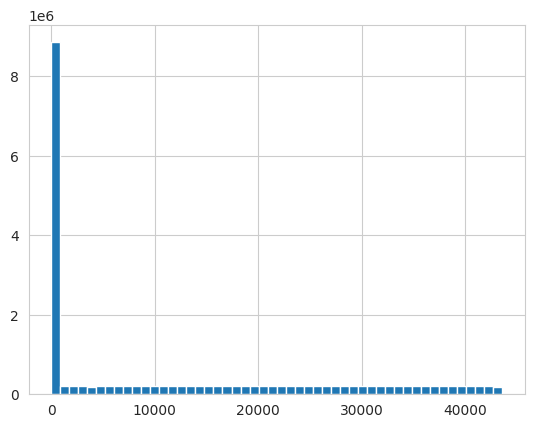

In [ ]:
df_combined_accounts.account_encoded.hist(bins=50)

<Axes: >

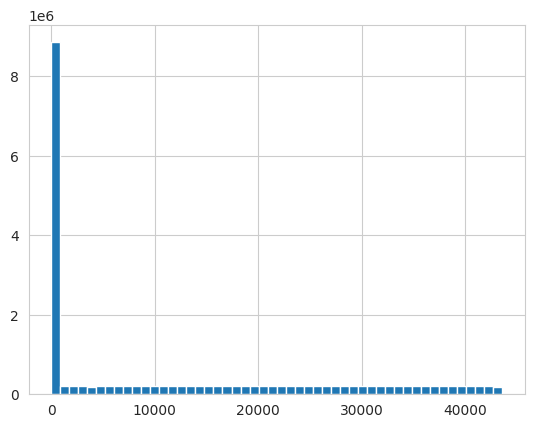

In [ ]:
df_combined_accounts.account_interaction_encoded.hist(bins=50)

In [ ]:
df_combined_accounts[['account_encoded']].value_counts().sort_values(ascending=True)

,count
account_encoded,
29510,21
16776,21
1496,21
20078,21
16773,21
...,...
37337,1489
24161,1490
20866,1491


In [ ]:
# Count the occurrences of each encoding in 'account_encoded'
account_encoded_counts = df_combined_accounts['account_encoded'].value_counts()

print(encoding_counts)

account_interaction_encoded
0        8634168
12757       1498
20866       1491
24161       1490
37337       1489
          ...   
4529          21
15994         21
25586         21
25173         21
4124          21
Name: count, Length: 43557, dtype: int64


### Normalizing 'time interval'

In [ ]:
# handling missing value in 'time interval', transforming into 'minutes' and encoding
df_combined_accounts['time_interval_minutes'] = df_combined_accounts['time_interval'].fillna(pd.Timedelta(0))

df_combined_accounts['time_interval_minutes'] = df_combined_accounts['time_interval_minutes'].dt.total_seconds()/60

df_combined_accounts.tail()

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,...,time_of_day_encoded,account_interaction,transaction_type,time2,datetime,time_interval,transaction_type_encoded,account_interaction_encoded,account_encoded,time_interval_minutes
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,...,2,2812722257,sent,18:33:08,2023-06-15 18:33:08,0 days 01:17:23,0,12177,0,77.383333
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,...,2,2812722257,sent,19:46:17,2023-06-15 19:46:17,0 days 01:13:09,0,12177,0,73.150000
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,...,2,2812722257,sent,20:48:31,2023-06-15 20:48:31,0 days 01:02:14,0,12177,0,62.233333
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,...,3,2812722257,sent,21:29:01,2023-06-15 21:29:01,0 days 00:40:30,0,12177,0,40.500000
9504851,9999986843,1900-01-01 22:54:45,2023-06-15,6647.08,0,10,10,16,16,13,...,3,2812722257,sent,22:54:45,2023-06-15 22:54:45,0 days 01:25:44,0,12177,0,85.733333


In [ ]:
df_combined_accounts['time_interval_minutes'].describe()

,time_interval_minutes
count,1.900970e+07
mean,7.797065e+03
std,2.232768e+04
min,0.000000e+00
25%,1.028333e+01
50%,1.502167e+02
75%,2.770567e+03
max,4.564044e+05


In [ ]:
# Skewness check

df_combined_accounts['time_interval_minutes'].skew()

5.3750040224721625

In [ ]:
# Normalize time interval from 0-1 (use RobustScaler)

df_combined_accounts['time_interval_normalized'] = RobustScaler().fit_transform(df_combined_accounts[['time_interval_minutes']])

df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,...,account_interaction,transaction_type,time2,datetime,time_interval,transaction_type_encoded,account_interaction_encoded,account_encoded,time_interval_minutes,time_interval_normalized
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,...,6080420349,received,21:32:35,2023-07-21 21:32:35,NaT,1,26377,0,0.000000,-0.054421
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,...,2388293593,sent,09:51:28,2023-07-22 09:51:28,0 days 12:18:53,0,0,0,738.883333,0.213263
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,...,2595228252,received,16:20:16,2022-11-24 16:20:16,NaT,1,11232,0,0.000000,-0.054421
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,...,2595228252,received,04:28:33,2022-12-06 04:28:33,11 days 12:08:17,1,11232,0,16568.283333,5.947964
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,...,2595228252,received,19:44:39,2023-01-12 19:44:39,37 days 15:16:06,1,11232,0,54196.100000,19.579832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,...,2812722257,sent,18:33:08,2023-06-15 18:33:08,0 days 01:17:23,0,12177,0,77.383333,-0.026386
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,...,2812722257,sent,19:46:17,2023-06-15 19:46:17,0 days 01:13:09,0,12177,0,73.150000,-0.027920
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,...,2812722257,sent,20:48:31,2023-06-15 20:48:31,0 days 01:02:14,0,12177,0,62.233333,-0.031875
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,...,2812722257,sent,21:29:01,2023-06-15 21:29:01,0 days 00:40:30,0,12177,0,40.500000,-0.039748


### Normalizing 'amount' of money

In [ ]:
# Skewness check

df_combined_accounts['amount'].skew()

102.1640938343192

In [ ]:
df_combined_accounts['amount'].describe()

,amount
count,1.900970e+07
mean,8.762968e+03
std,2.561495e+04
min,3.730000e+00
25%,2.143688e+03
50%,6.113720e+03
75%,1.045846e+04
max,1.261850e+07


<Axes: >

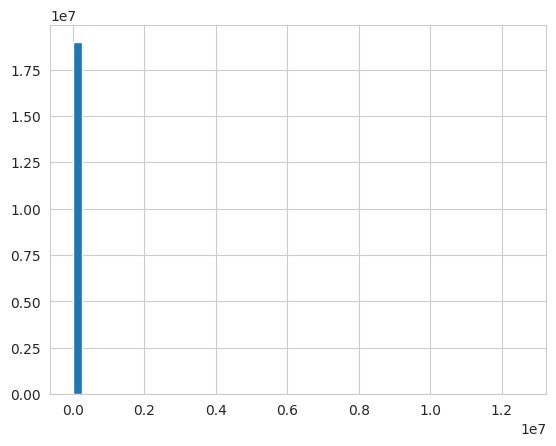

In [ ]:
df_combined_accounts.amount.hist(bins=50)

In [ ]:
# using RobustScaler
df_combined_accounts['amount_normalized'] = RobustScaler().fit_transform(df_combined_accounts[['amount']])

df_combined_accounts

,account,time,date,amount,is_laundering,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,laundering_type_encoded,...,transaction_type,time2,datetime,time_interval,transaction_type_encoded,account_interaction_encoded,account_encoded,time_interval_minutes,time_interval_normalized,amount_normalized
9504852,9018,1900-01-01 21:32:35,2023-07-21,3319.06,0,10,10,16,16,15,...,received,21:32:35,2023-07-21 21:32:35,NaT,1,26377,0,0.000000,-0.054421,-0.336108
0,9018,1900-01-01 09:51:28,2023-07-22,3319.06,0,10,2,16,3,15,...,sent,09:51:28,2023-07-22 09:51:28,0 days 12:18:53,0,0,0,738.883333,0.213263,-0.336108
9504853,13266,1900-01-01 16:20:16,2022-11-24,1178.70,0,10,10,16,16,20,...,received,16:20:16,2022-11-24 16:20:16,NaT,1,11232,0,0.000000,-0.054421,-0.593524
9504854,13266,1900-01-01 04:28:33,2022-12-06,2218.12,0,10,10,16,16,20,...,received,04:28:33,2022-12-06 04:28:33,11 days 12:08:17,1,11232,0,16568.283333,5.947964,-0.468515
9504855,13266,1900-01-01 19:44:39,2023-01-12,594.97,0,10,10,16,16,20,...,received,19:44:39,2023-01-12 19:44:39,37 days 15:16:06,1,11232,0,54196.100000,19.579832,-0.663728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,1900-01-01 18:33:08,2023-06-15,6634.60,0,10,10,16,16,13,...,sent,18:33:08,2023-06-15 18:33:08,0 days 01:17:23,0,12177,0,77.383333,-0.026386,0.062645
9504848,9999986843,1900-01-01 19:46:17,2023-06-15,6667.48,0,10,10,16,16,13,...,sent,19:46:17,2023-06-15 19:46:17,0 days 01:13:09,0,12177,0,73.150000,-0.027920,0.066600
9504849,9999986843,1900-01-01 20:48:31,2023-06-15,6671.73,0,10,10,16,16,13,...,sent,20:48:31,2023-06-15 20:48:31,0 days 01:02:14,0,12177,0,62.233333,-0.031875,0.067111
9504850,9999986843,1900-01-01 21:29:01,2023-06-15,6633.19,0,10,10,16,16,13,...,sent,21:29:01,2023-06-15 21:29:01,0 days 00:40:30,0,12177,0,40.500000,-0.039748,0.062476


In [ ]:
df_combined_accounts['amount_normalized'].sort_values(ascending=True)

,amount_normalized
9859373,-0.734835
5147460,-0.734835
8808437,-0.734775
17454452,-0.734775
16816366,-0.734743
...,...
1433836,1422.919033
18931174,1485.629138
2174078,1485.629138
10186256,1516.864218


In [ ]:
df_combined_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19009704 entries, 9504852 to 9504851
Data columns (total 24 columns):
 #   Column                          Dtype          
---  ------                          -----          
 0   account                         int64          
 1   time                            datetime64[ns] 
 2   date                            datetime64[ns] 
 3   amount                          float64        
 4   is_laundering                   int64          
 5   payment_currency_encoded        int64          
 6   received_currency_encoded       int64          
 7   sender_bank_location_encoded    int64          
 8   receiver_bank_location_encoded  int64          
 9   laundering_type_encoded         int64          
 10  day_of_week_encoded             int64          
 11  hour                            int32          
 12  time_of_day_encoded             int64          
 13  account_interaction             int64          
 14  transaction_type                

##  df_combined_accounts : Save to Parguet
(for future quick re-running code)

In [ ]:
path_df_combined_accounts = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_combined_accounts.parquet"
df_combined_accounts.to_parquet(path_df_combined_accounts)

In [ ]:
# Start here
path_df_combined_accounts = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_combined_accounts.parquet"
df_combined_accounts = pd.read_parquet(path_df_combined_accounts)

### Feature Selection

In [ ]:
df_test1 = df_combined_accounts[['account', 'account_encoded', 'day_of_week_encoded','hour','time_interval_normalized','amount_normalized',\
                                'account_interaction','account_interaction_encoded', 'transaction_type_encoded',\
                                 'payment_currency_encoded','received_currency_encoded','sender_bank_location_encoded',\
                                'receiver_bank_location_encoded','is_laundering']].copy()
df_test1

,account,account_encoded,day_of_week_encoded,hour,time_interval_normalized,amount_normalized,account_interaction,account_interaction_encoded,transaction_type_encoded,payment_currency_encoded,received_currency_encoded,sender_bank_location_encoded,receiver_bank_location_encoded,is_laundering
9504852,9018,0,4,21,-0.054421,-0.336108,6080420349,26377,1,10,10,16,16,0
0,9018,0,5,9,0.213263,-0.336108,2388293593,0,0,10,2,16,3,0
9504853,13266,0,3,16,-0.054421,-0.593524,2595228252,11232,1,10,10,16,16,0
9504854,13266,0,1,4,5.947964,-0.468515,2595228252,11232,1,10,10,16,16,0
9504855,13266,0,3,19,19.579832,-0.663728,2595228252,11232,1,10,10,16,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9999986843,0,3,18,-0.026386,0.062645,2812722257,12177,0,10,10,16,16,0
9504848,9999986843,0,3,19,-0.027920,0.066600,2812722257,12177,0,10,10,16,16,0
9504849,9999986843,0,3,20,-0.031875,0.067111,2812722257,12177,0,10,10,16,16,0
9504850,9999986843,0,3,21,-0.039748,0.062476,2812722257,12177,0,10,10,16,16,0


In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19009704 entries, 9504852 to 9504851
Data columns (total 14 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   account                         int64  
 1   account_encoded                 int64  
 2   day_of_week_encoded             int64  
 3   hour                            int32  
 4   time_interval_normalized        float64
 5   amount_normalized               float64
 6   account_interaction             int64  
 7   account_interaction_encoded     int64  
 8   transaction_type_encoded        int64  
 9   payment_currency_encoded        int64  
 10  received_currency_encoded       int64  
 11  sender_bank_location_encoded    int64  
 12  receiver_bank_location_encoded  int64  
 13  is_laundering                   int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 2.1 GB


##  df_test1 : Save to Parguet
(for future quick re-running code)

In [ ]:
path_df_test1 = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_test1.parquet"
df_test1.to_parquet(path_df_test1)


In [ ]:
# Start here
path_df_test1 = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_test1.parquet"
df_test1 = pd.read_parquet(path_df_test1)

# 6) Data Preperation
Create a DataFrame grouped by account, with:

- A new column named 'events', which
contains a list of all features' events associated with each account. (excluding target feature)
- A new column named 'targets', which contains a list of all the results of 'is_laundering' for each event.

## Create list of 'events' & list of 'targets' by a/c

In [ ]:
# Create list of 'events' by account. Convert each row to a dictionary,then remove 'is_laundering' (which is target) from each dictionary

def create_account_history(df_acc_groupby):
    df_acc_events = df_acc_groupby.apply(lambda row: {k: v for k, v in row.to_dict()\
                                                      .items() if k != 'is_laundering'}, axis=1)
    return df_acc_events.to_list()  # Convert the resulting series of dictionaries into a list

In [ ]:
test_events = df_test1.groupby("account").apply(create_account_history)

test_events.name = "events"
test_events

<ipython-input-154-e3e0ac51c4cf>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_events = df_test1.groupby("account").apply(create_account_history)


,events
account,
9018,"[{'account': 9018.0, 'account_encoded': 0.0, '..."
13266,"[{'account': 13266.0, 'account_encoded': 0.0, ..."
23159,"[{'account': 23159.0, 'account_encoded': 0.0, ..."
28511,"[{'account': 28511.0, 'account_encoded': 0.0, ..."
32095,"[{'account': 32095.0, 'account_encoded': 0.0, ..."
...,...
9999933179,"[{'account': 9999933179.0, 'account_encoded': ..."
9999958143,"[{'account': 9999958143.0, 'account_encoded': ..."
9999967460,"[{'account': 9999967460.0, 'account_encoded': ..."


In [ ]:
test_events.apply(len).sort_values(ascending=True)

,events
account,
959496397,1
5916258207,1
5916136942,1
5915971243,1
5915958336,1
...,...
2357599526,1481
8600542721,1489
5579295130,1490


In [ ]:
test_events.loc[5915958336]

[{'account': 5915958336.0,
  'account_encoded': 0.0,
  'day_of_week_encoded': 0.0,
  'hour': 13.0,
  'time_interval_normalized': -0.054420741832058306,
  'amount_normalized': 66.98771163380849,
  'account_interaction': 5104637800.0,
  'account_interaction_encoded': 22156.0,
  'transaction_type_encoded': 1.0,
  'payment_currency_encoded': 10.0,
  'received_currency_encoded': 10.0,
  'sender_bank_location_encoded': 16.0,
  'receiver_bank_location_encoded': 16.0}]

In [ ]:
# Create list of 'targets' by account.
def create_targets_history(df_acc_groupby):
  return df_acc_groupby['is_laundering'].to_list() #Converts the resulting series by account into a list.


In [ ]:
test_targets = df_test1.groupby('account').apply(create_targets_history)

test_targets.name = "targets"
test_targets

<ipython-input-158-3bb9e32404b0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_targets = df_test1.groupby('account').apply(create_targets_history)


,targets
account,
9018,"[0, 0]"
13266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23159,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28511,"[0, 0, 0, 0, 0, 0, 0, 0]"
32095,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...
9999933179,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9999958143,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9999967460,"[0, 0, 0]"


In [ ]:
test_targets.apply(len).sort_values(ascending=True)

,targets
account,
959496397,1
5916258207,1
5916136942,1
5915971243,1
5915958336,1
...,...
2357599526,1481
8600542721,1489
5579295130,1490


In [ ]:
# merge by account with features 'events' and 'targets' into the same dataFrame
df_test2 = pd.concat([test_events, test_targets], axis=1)
df_test2

,events,targets
account,,
9018,"[{'account': 9018.0, 'account_encoded': 0.0, '...","[0, 0]"
13266,"[{'account': 13266.0, 'account_encoded': 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23159,"[{'account': 23159.0, 'account_encoded': 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28511,"[{'account': 28511.0, 'account_encoded': 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0]"
32095,"[{'account': 32095.0, 'account_encoded': 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
9999933179,"[{'account': 9999933179.0, 'account_encoded': ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9999958143,"[{'account': 9999958143.0, 'account_encoded': ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9999967460,"[{'account': 9999967460.0, 'account_encoded': ...","[0, 0, 0]"


In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855460 entries, 9018 to 9999986843
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   events   855460 non-null  object
 1   targets  855460 non-null  object
dtypes: object(2)
memory usage: 51.8+ MB


##  df_test2 : Save to Parguet
(for future quick re-running code)

In [ ]:
path_df_test2 = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_test2.parquet"
df_test2.to_parquet(path_df_test2)

In [ ]:
# for reloading --> Start here
path_df_test2 = "/content/drive/MyDrive/DE/Master_Degree/3rd_Semester/Colab_Notebook/AML_file/df_test2.parquet"
df_test2 = pd.read_parquet(path_df_test2)

## check if are there any unique accounts contain > sum =1

In [ ]:
#check if are there any unique accounts contain > sum =1
df_test2['targets_sum'] = df_test2['targets'].apply(sum)

# Filter rows where the sum of targets is greater than 1
filtered_accounts = df_test2[df_test2['targets_sum'] > 1].sort_values(by='targets_sum', ascending=True)

# Display the result
print("Accounts with sum > 1 in targets:")
print(filtered_accounts)

Accounts with sum > 1 in targets:
                                                       events  \
account                                                         
9998803508  [{'account': 9998803508.0, 'account_encoded': ...   
6912681018  [{'account': 6912681018.0, 'account_encoded': ...   
3445859168  [{'account': 3445859168.0, 'account_encoded': ...   
3444453135  [{'account': 3444453135.0, 'account_encoded': ...   
3440604714  [{'account': 3440604714.0, 'account_encoded': ...   
...                                                       ...   
3790148325  [{'account': 3790148325.0, 'account_encoded': ...   
8227126673  [{'account': 8227126673.0, 'account_encoded': ...   
6123421761  [{'account': 6123421761.0, 'account_encoded': ...   
1665774528  [{'account': 1665774528.0, 'account_encoded': ...   
6844529387  [{'account': 6844529387.0, 'account_encoded': ...   

                                                      targets  targets_sum  
account                                    

# Mutual Information

(check dependency  between target and other features)

MI classif

Mutual Information Scores (Classification):
hour                              0.199986
day_of_week_encoded               0.112562
account_encoded                   0.002478
account_interaction_encoded       0.002468
account                           0.002407
account_interaction               0.002405
amount_normalized                 0.001214
amount                            0.001213
time_interval_normalized          0.000644
transaction_type_encoded          0.000000
payment_currency_encoded          0.000000
received_currency_encoded         0.000000
sender_bank_location_encoded      0.000000
receiver_bank_location_encoded    0.000000
dtype: float64


<ipython-input-113-1809e34ccc8c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=mi_aml_scores.values, y=mi_aml_scores.index, palette="viridis_r")


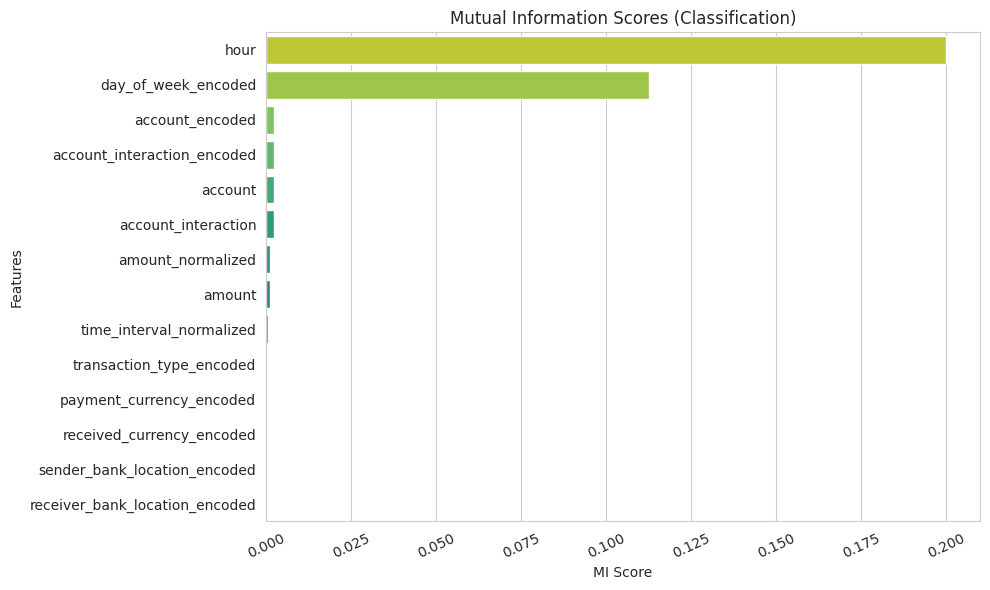

In [ ]:
X = df_combined_accounts[['account', 'account_encoded', 'day_of_week_encoded', 'hour', 'time_interval_normalized', 'amount_normalized',
              'account_interaction', 'account_interaction_encoded', 'transaction_type_encoded', 'amount',
              'payment_currency_encoded', 'received_currency_encoded', 'sender_bank_location_encoded',
              'receiver_bank_location_encoded']]
y = df_combined_accounts['is_laundering']

# Calculate Mutual Information scores for classification
mi_aml = mutual_info_classif(X=X, y=y, random_state=42)

# Create a Series for better visualization
mi_aml_scores = pd.Series(mi_aml, index=X.columns)
mi_aml_scores.sort_values(ascending=False, inplace=True)

print("Mutual Information Scores (Classification):")
print(mi_aml_scores)


plt.figure(figsize=(10, 6))
sb.barplot(x=mi_aml_scores.values, y=mi_aml_scores.index, palette="viridis_r")
plt.xticks(rotation=25)
plt.title("Mutual Information Scores (Classification)")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()